# 5th Notebook for Machine Learning Intro Lecture

# 1. introductory kaggle challenge

We will compete in our first [kaggle challenge](https://www.kaggle.com/c/titanic) on the prediction of titanic survivors. 



### Preprocessing and Data check

In [ ]:
### Data preprocess

# load and check the data
allTrain = read.csv(file = "/Users/Jann/Desktop/titanic_challenge/train.csv")
str(allTrain)
# no target column "survived" on test dataset
allTest = read.csv(file = "/Users/Jann/Desktop/titanic_challenge/test.csv")

# can we use all features? 
# Nope: delete those with too many levels as this would inflate the model 
# also kill the ID

train = allTrain[, -c(which(colnames(allTrain) == "Cabin"), 
    which(colnames(allTrain) == "Name"), 
    which(colnames(allTrain) == "Ticket"), 
    which(colnames(allTrain) == "PassengerId"))]

test = allTest[, -c(which(colnames(allTest) == "Cabin"), 
    which(colnames(allTest) == "Name"), 
    which(colnames(allTest) == "Ticket"), 
    which(colnames(allTest) == "PassengerId"))]

Build a first simple model with mlr and check the performance via CV

In [5]:
### model corner
library(mlr)

# choose specific model and parameters 
task = makeClassifTask(data = train, target = "Survived")

learner1 = makeLearner(cl = "classif.rpart")
# check choosable parameters and set accordingly
getLearnerParamSet(learner1)
# check available settings here: https://www.rdocumentation.org/packages/rpart/versions/4.1-12/topics/rpart.control
learner1 = makeLearner(cl = "classif.rpart", 
    par.vals = list(minsplit = 10, cp = 0.05))

# make sure to assign mlr package to train
mod1 = mlr::train(learner = learner1, task = task)

### performance estimate via CV
cv = makeResampleDesc(method = "CV", iters = 10)
# use mlr::listMeasures() to get list of possible measures
# important: always check on which measure they evaluate you!
mlr::crossval(learner = learner1, task = task, iters = 10, measures = list(mmce, acc))


                   Type len  Def   Constr Req Tunable Trafo
minsplit        integer   -   20 1 to Inf   -    TRUE     -
minbucket       integer   -    - 1 to Inf   -    TRUE     -
cp              numeric   - 0.01   0 to 1   -    TRUE     -
maxcompete      integer   -    4 0 to Inf   -    TRUE     -
maxsurrogate    integer   -    5 0 to Inf   -    TRUE     -
usesurrogate   discrete   -    2    0,1,2   -    TRUE     -
surrogatestyle discrete   -    0      0,1   -    TRUE     -
maxdepth        integer   -   30  1 to 30   -    TRUE     -
xval            integer   -   10 0 to Inf   -   FALSE     -
parms           untyped   -    -        -   -    TRUE     -

[Resample] cross-validation iter 1: mmce.test.mean=0.18,acc.test.mean=0.82
[Resample] cross-validation iter 2: mmce.test.mean=0.124,acc.test.mean=0.876
[Resample] cross-validation iter 3: mmce.test.mean=0.236,acc.test.mean=0.764
[Resample] cross-validation iter 4: mmce.test.mean=0.244,acc.test.mean=0.756
[Resample] cross-validation iter 5: mmce.test.mean=0.157,acc.test.mean=0.843
[Resample] cross-validation iter 6: mmce.test.mean=0.247,acc.test.mean=0.753
[Resample] cross-validation iter 7: mmce.test.mean=0.157,acc.test.mean=0.843
[Resample] cross-validation iter 8: mmce.test.mean=0.292,acc.test.mean=0.708
[Resample] cross-validation iter 9: mmce.test.mean=0.326,acc.test.mean=0.674
[Resample] cross-validation iter 10: mmce.test.mean=0.169,acc.test.mean=0.831
[Resample] Aggr. Result: mmce.test.mean=0.213,acc.test.mean=0.787


Resample Result
Task: train
Learner: classif.rpart
Aggr perf: mmce.test.mean=0.213,acc.test.mean=0.787
Runtime: 0.430718

### Tune the Hyperparameters of the algorithm

                   Type len  Def   Constr Req Tunable Trafo
minsplit        integer   -   20 1 to Inf   -    TRUE     -
minbucket       integer   -    - 1 to Inf   -    TRUE     -
cp              numeric   - 0.01   0 to 1   -    TRUE     -
maxcompete      integer   -    4 0 to Inf   -    TRUE     -
maxsurrogate    integer   -    5 0 to Inf   -    TRUE     -
usesurrogate   discrete   -    2    0,1,2   -    TRUE     -
surrogatestyle discrete   -    0      0,1   -    TRUE     -
maxdepth        integer   -   30  1 to 30   -    TRUE     -
xval            integer   -   10 0 to Inf   -   FALSE     -
parms           untyped   -    -        -   -    TRUE     -

[Tune] Started tuning learner classif.rpart for parameter set:
             Type len Def                                 Constr Req Tunable
minsplit discrete   -   - 1,3,5,7,10,15,20,30,40,45,50,60,70,100   -    TRUE
cp        numeric   -   -                          0.0001 to 0.1   -    TRUE
         Trafo
minsplit     -
cp           -
With control class: TuneControlRandom
Imputation value: 1Imputation value: -0
[Tune-x] 1: minsplit=10; cp=0.0877
[Tune-y] 1: mmce.test.mean=0.213,acc.test.mean=0.787; time: 0.0 min
[Tune-x] 2: minsplit=70; cp=0.0811
[Tune-y] 2: mmce.test.mean=0.213,acc.test.mean=0.787; time: 0.0 min
[Tune-x] 3: minsplit=1; cp=0.0217
[Tune-y] 3: mmce.test.mean=0.176,acc.test.mean=0.824; time: 0.0 min
[Tune-x] 4: minsplit=10; cp=0.0893
[Tune-y] 4: mmce.test.mean=0.213,acc.test.mean=0.787; time: 0.0 min
[Tune-x] 5: minsplit=20; cp=0.0848
[Tune-y] 5: mmce.test.mean=0.213,acc.test.mean=0.787; time: 0.0 min
[Tune-x] 6: minsplit=10; cp=0.0733
[Tune-y] 6: mmce.test.mean=0.213,a

[Tune-x] 76: minsplit=30; cp=0.0889
[Tune-y] 76: mmce.test.mean=0.213,acc.test.mean=0.787; time: 0.0 min
[Tune-x] 77: minsplit=100; cp=0.0367
[Tune-y] 77: mmce.test.mean=0.176,acc.test.mean=0.824; time: 0.0 min
[Tune-x] 78: minsplit=70; cp=0.00213
[Tune-y] 78: mmce.test.mean=0.194,acc.test.mean=0.806; time: 0.0 min
[Tune-x] 79: minsplit=50; cp=0.0474
[Tune-y] 79: mmce.test.mean=0.184,acc.test.mean=0.816; time: 0.0 min
[Tune-x] 80: minsplit=50; cp=0.0801
[Tune-y] 80: mmce.test.mean=0.213,acc.test.mean=0.787; time: 0.0 min
[Tune-x] 81: minsplit=100; cp=0.0502
[Tune-y] 81: mmce.test.mean=0.191,acc.test.mean=0.809; time: 0.0 min
[Tune-x] 82: minsplit=50; cp=0.0948
[Tune-y] 82: mmce.test.mean=0.213,acc.test.mean=0.787; time: 0.0 min
[Tune-x] 83: minsplit=70; cp=0.0326
[Tune-y] 83: mmce.test.mean=0.176,acc.test.mean=0.824; time: 0.0 min
[Tune-x] 84: minsplit=50; cp=0.0803
[Tune-y] 84: mmce.test.mean=0.213,acc.test.mean=0.787; time: 0.0 min
[Tune-x] 85: minsplit=60; cp=0.0393
[Tune-y] 85: mmc

ERROR: Error in checkLearner(learner): Objekt 'lrn' nicht gefunden


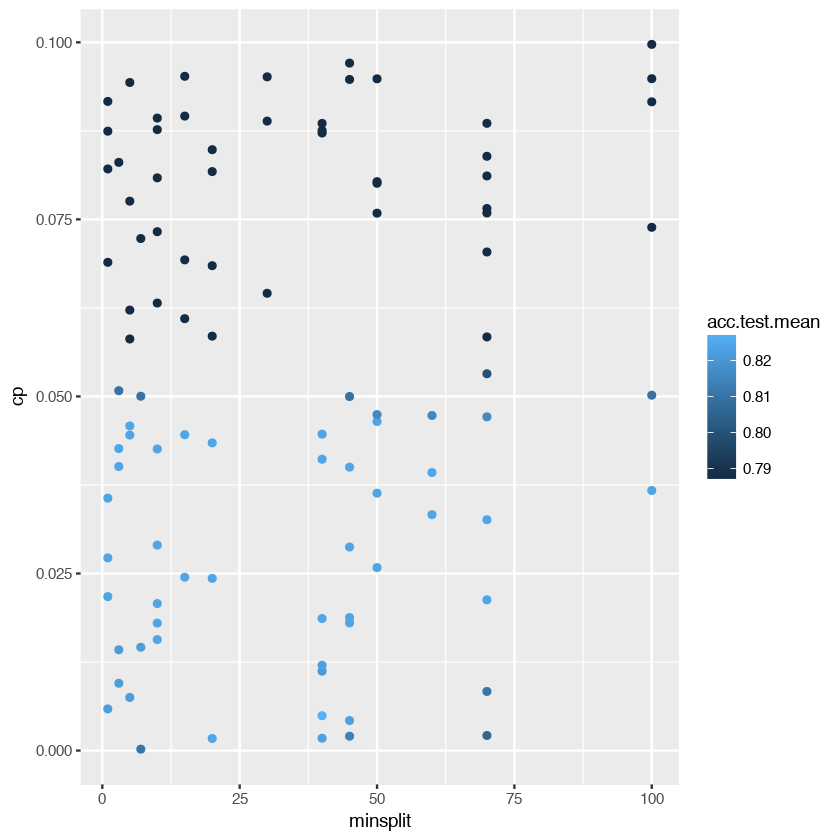

In [9]:
### Tune the model 
# we chose two numeric parameters above and now search for optimal values
getLearnerParamSet(learner1)
paramSet = makeParamSet(
    makeDiscreteParam("minsplit", values = c(1, 3, 5, 7, 10, 15, 20, 30, 40, 45, 50, 60, 70, 100)), 
    makeNumericParam("cp", lower = 0.0001, upper = 0.1)
)
# choose random search - why not grid search?
ctrl = makeTuneControlRandom(maxit = 100)
resDesc = makeResampleDesc("CV", iters = 10L, predict = "both")
tunes = mlr::tuneParams(learner = learner1, task = task, resampling = resDesc,
    par.set = paramSet, control = ctrl, measures = list(mmce, acc))

visHyper = generateHyperParsEffectData(tunes)
plt = plotHyperParsEffect(visHyper, x = "minsplit", y = "cp", z = "acc.test.mean")
plt

# use those param settings for the CART
learner1Nice = tunes$learner
mod1Nice = mlr::train(learner = lrn, task = task)

# predict for submission
pred1 = predict(mod1Nice, newdata = test)
submission1 = pred1$data

submission1$PassengerId = allTest$PassengerId

colnames(submission1) = c("Survived", "PassengerId")

write.csv(submission1, file = "/Users/Jann/Desktop/submissionTitanic.csv", row.names = FALSE)

### Feature engineering

Can we further condense the information from the multi-level factors and use it for our model?

We take a closer look at the names of the guests. 


In [7]:

### feature engineering
library(dplyr)

# indicator for train or test set
allTrain$train = 1
allTest$train = 0
allTest$Survived = NA

# compute once for all data and split again for training with ID
allData = rbind(allTrain, allTest)
engData = allData

head(allData$Name)

# use regular expressions via strplit to extract the title of the people
# temporary storage
temp = sapply(strsplit(as.character(allData$Name), split = ","), function(x) x[2])
title = strsplit(temp, split = " ")
engData$title = sapply(title, function(x) x[2])
# unfortunately still too many titles with too less observations
table(engData$title)
# btw.: we found the captain:
allData[which(engData$title == "Capt."), "Name"]

# condense those with obs < 5 to class "other"
freqs = as.data.frame(table(engData$title))
otherTitles = freqs[which(freqs$Freq < 5), "Var1"]
engData[which(engData$title %in% otherTitles), "title"] = "other"
engData$title = as.factor(engData$title)
# looks better now
table(engData$title)



Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



[1] Braund, Mr. Owen Harris                            
[2] Cumings, Mrs. John Bradley (Florence Briggs Thayer)
[3] Heikkinen, Miss. Laina                             
[4] Futrelle, Mrs. Jacques Heath (Lily May Peel)       
[5] Allen, Mr. William Henry                           
[6] Moran, Mr. James                                   
1307 Levels: Abbing, Mr. Anthony ... Zakarian, Mr. Ortin


    Capt.      Col.      Don.     Dona.       Dr. Jonkheer.     Lady.    Major. 
        1         4         1         1         8         1         1         2 
  Master.     Miss.     Mlle.      Mme.       Mr.      Mrs.       Ms.      Rev. 
       61       260         2         1       757       197         2         8 
     Sir.       the 
        1         1 

[1] Crosby, Capt. Edward Gifford
1307 Levels: Abbing, Mr. Anthony ... Zakarian, Mr. Ortin


    Dr. Master.   Miss.     Mr.    Mrs.   other    Rev. 
      8      61     260     757     197      18       8 

### Build updated model

In [10]:
### model corner 2 with engineered feature
library(mlr)
library(dplyr)

train = engData %>% 
    filter(train == 1) %>%
    select(-c(PassengerId, Name, Ticket, train, Cabin))

test = engData %>% 
    filter(train == 0) %>%
    select(-c(PassengerId, Name, Ticket, train, Cabin, Survived))

# choose specific model and parameters 
task = makeClassifTask(data = train, target = "Survived")

learner2 = makeLearner(cl = "classif.rpart")
# we chose two numeric parameters above and now search for optimal values
paramSet = makeParamSet(
    makeDiscreteParam("minsplit", values = c(1, 3, 5, 7, 10, 15, 20, 30, 40, 45, 50, 60, 70, 100)), 
    makeNumericParam("cp", lower = 0.0001, upper = 0.1)
)
# choose random search - why not grid search?
ctrl = makeTuneControlRandom(maxit = 100)
resDesc = makeResampleDesc("CV", iters = 10L, predict = "both")
tunes2 = mlr::tuneParams(learner = learner2, task = task, resampling = resDesc,
    par.set = paramSet, control = ctrl, measures = list(mmce, acc))

tunes2$learner

# use those param settings for the CART
learner2 = tunes2$learner
mod2 = mlr::train(learner = learner2, task = task)

# predict for submission
pred2 = predict(mod2, newdata = test)
submission2 = pred2$data

submission2$PassengerId = engData %>% 
    filter(train == 0) %>%
    select(PassengerId)

colnames(submission2) = c("Survived", "PassengerId")

write.csv(submission2, file = "/Users/Jann/Desktop/submissionTitanic2.csv", row.names = FALSE)

[Tune] Started tuning learner classif.rpart for parameter set:
             Type len Def                                 Constr Req Tunable
minsplit discrete   -   - 1,3,5,7,10,15,20,30,40,45,50,60,70,100   -    TRUE
cp        numeric   -   -                          0.0001 to 0.1   -    TRUE
         Trafo
minsplit     -
cp           -
With control class: TuneControlRandom
Imputation value: 1Imputation value: -0
[Tune-x] 1: minsplit=50; cp=0.00805
[Tune-y] 1: mmce.test.mean=0.181,acc.test.mean=0.819; time: 0.0 min
[Tune-x] 2: minsplit=7; cp=0.0539
[Tune-y] 2: mmce.test.mean=0.209,acc.test.mean=0.791; time: 0.0 min
[Tune-x] 3: minsplit=70; cp=0.0418
[Tune-y] 3: mmce.test.mean=0.177,acc.test.mean=0.823; time: 0.0 min
[Tune-x] 4: minsplit=5; cp=0.0575
[Tune-y] 4: mmce.test.mean=0.213,acc.test.mean=0.787; time: 0.0 min
[Tune-x] 5: minsplit=15; cp=0.035
[Tune-y] 5: mmce.test.mean=0.177,acc.test.mean=0.823; time: 0.0 min
[Tune-x] 6: minsplit=100; cp=0.0718
[Tune-y] 6: mmce.test.mean=0.213,a

[Tune-y] 75: mmce.test.mean=0.172,acc.test.mean=0.828; time: 0.0 min
[Tune-x] 76: minsplit=40; cp=0.0618
[Tune-y] 76: mmce.test.mean=0.213,acc.test.mean=0.787; time: 0.0 min
[Tune-x] 77: minsplit=30; cp=0.0473
[Tune-y] 77: mmce.test.mean=0.177,acc.test.mean=0.823; time: 0.0 min
[Tune-x] 78: minsplit=50; cp=0.0294
[Tune-y] 78: mmce.test.mean=0.177,acc.test.mean=0.823; time: 0.0 min
[Tune-x] 79: minsplit=60; cp=0.0643
[Tune-y] 79: mmce.test.mean=0.213,acc.test.mean=0.787; time: 0.0 min
[Tune-x] 80: minsplit=20; cp=0.0894
[Tune-y] 80: mmce.test.mean=0.213,acc.test.mean=0.787; time: 0.0 min
[Tune-x] 81: minsplit=50; cp=0.033
[Tune-y] 81: mmce.test.mean=0.177,acc.test.mean=0.823; time: 0.0 min
[Tune-x] 82: minsplit=7; cp=0.0185
[Tune-y] 82: mmce.test.mean=0.182,acc.test.mean=0.818; time: 0.0 min
[Tune-x] 83: minsplit=5; cp=0.0746
[Tune-y] 83: mmce.test.mean=0.213,acc.test.mean=0.787; time: 0.0 min
[Tune-x] 84: minsplit=10; cp=0.0959
[Tune-y] 84: mmce.test.mean=0.213,acc.test.mean=0.787; tim

# 2. Over- and Undersampling

[Lars Kotthof's](http://www.cs.uwyo.edu/%7Elarsko/ml-fac/05-input-exercises.pdf) exercices on over-/ undersampling and missing data imputation, very nice


His [chapter on feature engineering](http://www.cs.uwyo.edu/%7Elarsko/ml-fac/06-features-exercises.pdf) is also nice